# Problem 3: Barycentric interpolation

**Question 1 and 2**

Initially, we have to generate the random points and the function in the unit square for the given sample. Then we set building block 1 and 2. 

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]
r_ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y is in the triangle ABC with coordinates: [0.20901926 0.37774759]
r_CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
y is not in the triangle CDA


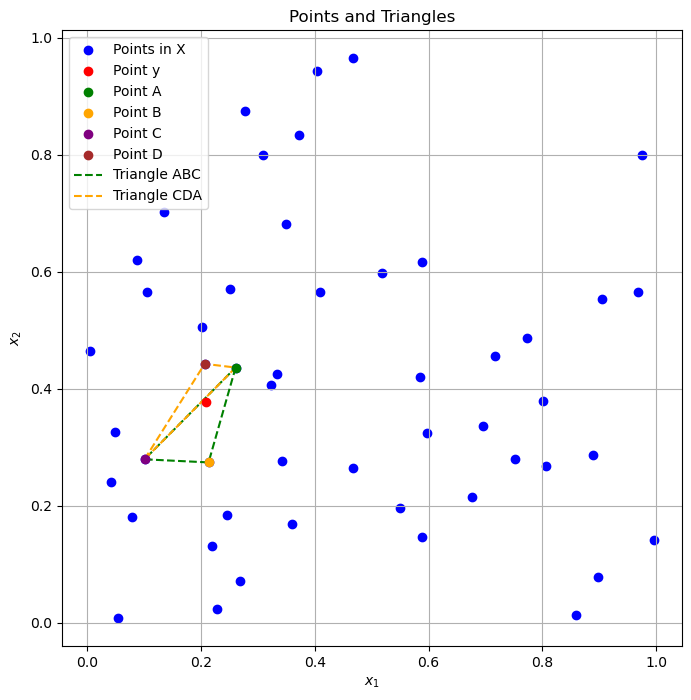

In [1]:
import numpy as np

# Generate random points and function values
def sample1(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    y= rng.uniform(size=(2,))
    return X, y

# Generate points and values
X, y = sample1()



# Building Block 1
def block_11(A, B, C, y):
    denominator = ((B[1]-C[1])*(A[0]-C[0]) + (C[0]-B[0])*(A[1]-C[1]))
    r1 = ((B[1]-C[1])*(y[0]-C[0]) + (C[0]-B[0])*(y[1]-C[1])) / denominator
    r2 = ((C[1]-A[1])*(y[0]-C[0]) + (A[0]-C[0])*(y[1]-C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3



# Building Block 2 (need to add NaN function)
def block_21(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None) #linalg.norm is euclidean distance
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    
    # Return NaN if any point is not found
    if A is None:
        A = np.nan
    if B is None:
        B = np.nan
    if C is None:
        C = np.nan
    if D is None:
        D = np.nan
    return A, B, C, D


# Find nearest points A, B, C, D
A, B, C, D = block_21(X, y)

print("A:", A) 
print("B:", B)
print("C:", C)
print("D:", D)

#print r_ABC if not NaN
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    r_ABC = block_11(A, B, C, y)
    print("r_ABC:", r_ABC)
    if 0 <= r_ABC[0] <= 1 and 0 <= r_ABC[1] <= 1 and 0 <= r_ABC[2] <= 1:
        y_ABC = r_ABC[0]*A + r_ABC[1]*B + r_ABC[2]*C
        print("y is in the triangle ABC with coordinates:", y_ABC)
    else:
        print("y is not in the triangle ABC")


#print r_CDA if not NaN
if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    r_CDA = block_11(C, D, A, y)
    print("r_CDA:", r_CDA)
    if 0 <= r_CDA[0] <= 1 and 0 <= r_CDA[1] <= 1 and 0 <= r_CDA[2] <= 1:
        y_CDA = r_CDA[0]*C + r_CDA[1]*D + r_CDA[2]*A
        print("y is the triangle CDA with coordinates:", y_CDA)
    else:
        print("y is not in the triangle CDA")


#Note that r1, r2 and r3 are in the interval [0,1] for r_ABC, why y is in the triangle ABC. We also note that for r_CDA this is not the case. We always have that:




import matplotlib.pyplot as plt

def plot_pointtriangle(X, y, A, B, C, D):
    if np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any() or np.isnan(D).any():
        print("NaN")
        return
    
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points in X')
    plt.scatter(y[0], y[1], c='red', label='Point y', zorder=5)
    
    if A is not None and not np.isnan(A).any():
        plt.scatter(*A, c='green', label='Point A', zorder=5)
    if B is not None and not np.isnan(B).any():
        plt.scatter(*B, c='orange', label='Point B', zorder=5)
    if C is not None and not np.isnan(C).any():
        plt.scatter(*C, c='purple', label='Point C', zorder=5)
    if D is not None and not np.isnan(D).any():
        plt.scatter(*D, c='brown', label='Point D', zorder=5)
    
    if A is not None and B is not None and C is not None and not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', label='Triangle ABC', linestyle='dashed')
    if C is not None and D is not None and A is not None and not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'orange', label='Triangle CDA', linestyle='dashed')
   
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Points and Triangles')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pointtriangle(X, y, A, B, C, D)

**Question 3**

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]
r_ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y is in the triangle ABC with coordinates: [0.20901926 0.37774759]
Approximation f(y) using ABC: 0.08405201731052576
Original y from Q1 and Q2: [0.20901926 0.37774759]
r_CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
y is not in the triangle CDA
Approximation f(y): 0.08405201731052576
True value f(y): 0.0789565216259594


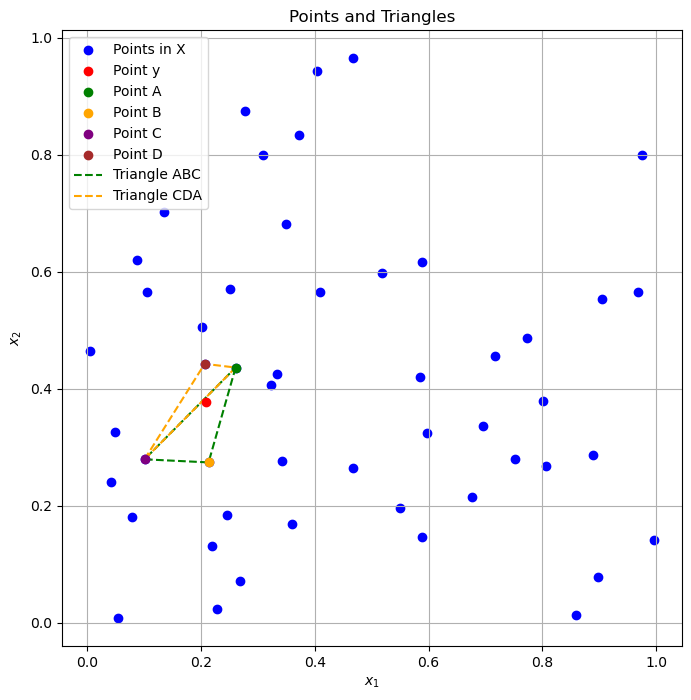

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points and function values
def sample2(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    y = rng.uniform(size=(2,))
    return X, y

# Generate points and values
X, y = sample2()

# Define the function f and compute F
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Building Block 1
def block_12(A, B, C, y):
    denominator = ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Building Block 2 (return NaN if points don't exist)
def block_22(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    
    # Return NaN if any point is not found
    if A is None:
        A = np.nan
    if B is None:
        B = np.nan
    if C is None:
        C = np.nan
    if D is None:
        D = np.nan
    return A, B, C, D

# Find nearest points A, B, C, D
A, B, C, D = block_22(X, y)

print("A:", A) 
print("B:", B)
print("C:", C)
print("D:", D)

# Barycentric coordinates of ABC and CDA
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    r_ABC = block_12(A, B, C, y)
    print("r_ABC:", r_ABC)
    if 0 <= r_ABC[0] <= 1 and 0 <= r_ABC[1] <= 1 and 0 <= r_ABC[2] <= 1:
        y_ABC = r_ABC[0]*A + r_ABC[1]*B + r_ABC[2]*C
        f_y_ABC = r_ABC[0]*f(A) + r_ABC[1]*f(B) + r_ABC[2]*f(C)
        print("y is in the triangle ABC with coordinates:", y_ABC)
        print("Approximation f(y) using ABC:", f_y_ABC)
        print("Original y from Q1 and Q2:", y)
    else:
        print("y is not in the triangle ABC")
        f_y_ABC = np.nan

if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    r_CDA = block_12(C, D, A, y)
    print("r_CDA:", r_CDA)
    if 0 <= r_CDA[0] <= 1 and 0 <= r_CDA[1] <= 1 and 0 <= r_CDA[2] <= 1:
        y_CDA = r_CDA[0]*C + r_CDA[1]*D + r_CDA[2]*A
        f_y_CDA = r_CDA[0]*f(C) + r_CDA[1]*f(D) + r_CDA[2]*f(A)
        print("y is in the triangle CDA with coordinates:", y_CDA)
        print("Approximation f(y) using CDA:", f_y_CDA)
        print("Original y from Q1 and Q2:", y)
    else:
        print("y is not in the triangle CDA")
        f_y_CDA = np.nan

# Choose the best approximation
if not np.isnan(f_y_ABC):
    f_y = f_y_ABC
elif not np.isnan(f_y_CDA):
    f_y = f_y_CDA
else:
    f_y = np.nan

# True value of f(y)
true_value = f(y)

# Print the approximation as well as the true value
print("Approximation f(y):", f_y_ABC)
print("True value f(y):", true_value)

# Plot the points and triangles
def plot_pointtriangle2(X, y, A, B, C, D):
    if np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any() or np.isnan(D).any():
        print("NaN")
        return
    
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points in X')
    plt.scatter(y[0], y[1], c='red', label='Point y', zorder=5)
    
    if A is not None and not np.isnan(A).any():
        plt.scatter(*A, c='green', label='Point A', zorder=5)
    if B is not None and not np.isnan(B).any():
        plt.scatter(*B, c='orange', label='Point B', zorder=5)
    if C is not None and not np.isnan(C).any():
        plt.scatter(*C, c='purple', label='Point C', zorder=5)
    if D is not None and not np.isnan(D).any():
        plt.scatter(*D, c='brown', label='Point D', zorder=5)
    
    if A is not None and B is not None and C is not None and not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', label='Triangle ABC', linestyle='dashed')
    if C is not None and D is not None and A is not None and not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'orange', label='Triangle CDA', linestyle='dashed')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Points and Triangles')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pointtriangle2(X, y, A, B, C, D)


Note that the approximated value of the barycentric coordinate should be compared to the true value.

**Question 4**


For y = [0.2 0.2]:
A: [0.21315735 0.274245  ]
B: [0.24520427 0.18478708]
C: [0.07872553 0.18082381]
D: [0.10056103 0.27951775]
r_ABC: (0.1805466701524854, 0.5826765149253863, 0.23677681492212832)
y is in the triangle ABC with coordinates: [0.2 0.2]
Approximation f(y) using ABC: 0.04032631372248057
r_CDA: (0.7507400810688765, -0.7794749222521683, 1.028734841183292)
y is not in the triangle CDA
Approximation f(y): 0.04032631372248057
True value f(y): 0.04000000000000001


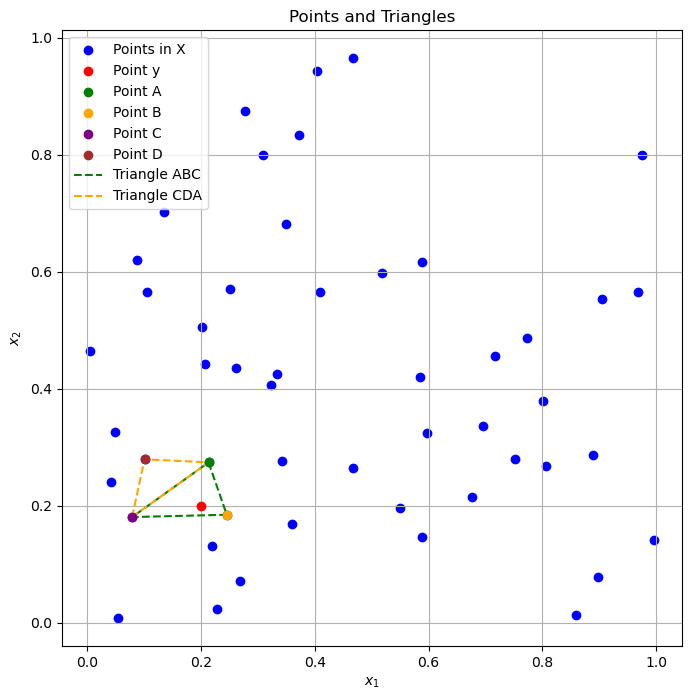


For y = [0.8 0.2]:
A: [0.80718199 0.26836533]
B: [0.89822733 0.07903432]
C: [0.58907501 0.14639442]
D: [0.75116956 0.27987271]
r_ABC: (0.5874166293573827, 0.2678463596528006, 0.14473701098981667)
y is in the triangle ABC with coordinates: [0.8 0.2]
Approximation f(y) using ABC: 0.15874233999349835
r_CDA: (0.4187612872222544, -1.5023945927888533, 2.083633305566599)
y is not in the triangle CDA
Approximation f(y): 0.15874233999349835
True value f(y): 0.16000000000000003


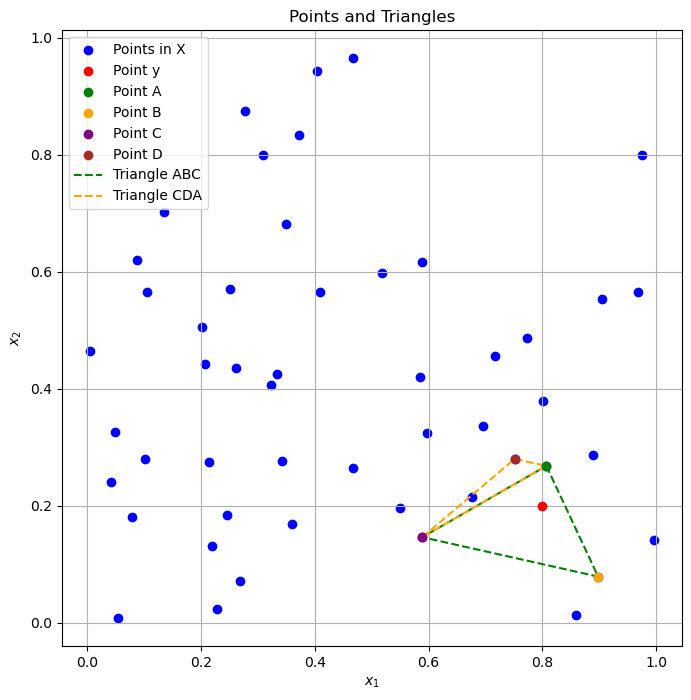


For y = [0.8 0.8]:
A: nan
B: [0.9756222  0.79942844]
C: [0.58875932 0.61680751]
D: [0.46801905 0.96493021]
Approximation f(y): nan
True value f(y): 0.6400000000000001
NaN

For y = [0.8 0.2]:
A: [0.80718199 0.26836533]
B: [0.89822733 0.07903432]
C: [0.58907501 0.14639442]
D: [0.75116956 0.27987271]
r_ABC: (0.5874166293573827, 0.2678463596528006, 0.14473701098981667)
y is in the triangle ABC with coordinates: [0.8 0.2]
Approximation f(y) using ABC: 0.15874233999349835
r_CDA: (0.4187612872222544, -1.5023945927888533, 2.083633305566599)
y is not in the triangle CDA
Approximation f(y): 0.15874233999349835
True value f(y): 0.16000000000000003


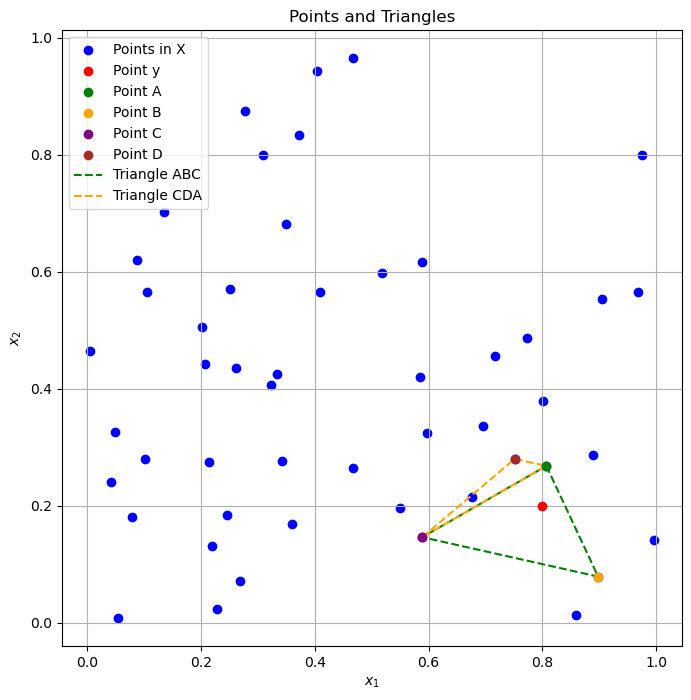


For y = [0.5 0.5]:
A: [0.51893133 0.59845416]
B: [0.58538723 0.42030016]
C: [0.33385622 0.42559779]
D: [0.40981568 0.56582111]
r_ABC: (0.4407329133559943, 0.3362411978710884, 0.2230258887729173)
y is in the triangle ABC with coordinates: [0.5 0.5]
Approximation f(y) using ABC: 0.2512901561119622
r_CDA: (0.7896805544065844, -1.1659086695972625, 1.3762281151906781)
y is not in the triangle CDA
Approximation f(y): 0.2512901561119622
True value f(y): 0.25


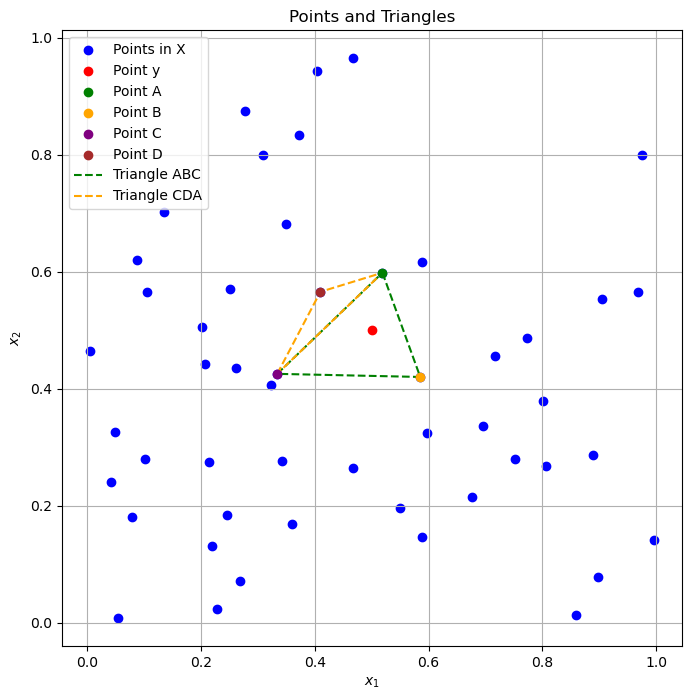

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points and function values
def sample3(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    return X

# Generate points and values
X = sample3()
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

# Define the function f and compute F
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

# Building Block 1
def block_13(A, B, C, y):
    denominator = ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Building Block 2 (return NaN if points don't exist)
def block_23(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    
    # Return NaN if any point is not found
    if A is None:
        A = np.nan
    if B is None:
        B = np.nan
    if C is None:
        C = np.nan
    if D is None:
        D = np.nan
    return A, B, C, D

# Loop through each point in Y
for y in Y:
    y = np.array(y)
    
    # Find nearest points A, B, C, D
    A, B, C, D = block_23(X, y)
    
    print(f"\nFor y = {y}:")
    print("A:", A) 
    print("B:", B)
    print("C:", C)
    print("D:", D)

    # Barycentric coordinates of ABC
    f_y_ABC = f_y_CDA = np.nan

    if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
        r_ABC = block_13(A, B, C, y)
        print("r_ABC:", r_ABC)
        if 0 <= r_ABC[0] <= 1 and 0 <= r_ABC[1] <= 1 and 0 <= r_ABC[2] <= 1:
            y_ABC = r_ABC[0] * A + r_ABC[1] * B + r_ABC[2] * C
            f_y_ABC = r_ABC[0] * f(A) + r_ABC[1] * f(B) + r_ABC[2] * f(C)
            print("y is in the triangle ABC with coordinates:", y_ABC)
            print("Approximation f(y) using ABC:", f_y_ABC)
        else:
            print("y is not in the triangle ABC")

    # Barycentric coordinates of CDA
    if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
        r_CDA = block_13(C, D, A, y)
        print("r_CDA:", r_CDA)
        if 0 <= r_CDA[0] <= 1 and 0 <= r_CDA[1] <= 1 and 0 <= r_CDA[2] <= 1:
            y_CDA = r_CDA[0] * C + r_CDA[1] * D + r_CDA[2] * A
            f_y_CDA = r_CDA[0] * f(C) + r_CDA[1] * f(D) + r_CDA[2] * f(A)
            print("y is in the triangle CDA with coordinates:", y_CDA)
            print("Approximation f(y) using CDA:", f_y_CDA)
        else:
            print("y is not in the triangle CDA")

    # Choose the best approximation
    if not np.isnan(f_y_ABC) and not np.isnan(f_y_CDA):
        f_y = (f_y_ABC + f_y_CDA) / 2  # Average if both are valid
    elif not np.isnan(f_y_ABC):
        f_y = f_y_ABC
    elif not np.isnan(f_y_CDA):
        f_y = f_y_CDA
    else:
        f_y = np.nan

    # True value
    true_value = f(y)
    print("Approximation f(y):", f_y)
    print("True value f(y):", true_value)
    
    # Plot the points and triangles for each y
    def plot_pointtriangle3(X, y, A, B, C, D):
        if np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any() or np.isnan(D).any():
            print("NaN")
            return

        plt.figure(figsize=(8, 8))
        plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points in X')
        plt.scatter(y[0], y[1], c='red', label='Point y', zorder=5)

        if A is not None and not np.isnan(A).any():
            plt.scatter(*A, c='green', label='Point A', zorder=5)
        if B is not None and not np.isnan(B).any():
            plt.scatter(*B, c='orange', label='Point B', zorder=5)
        if C is not None and not np.isnan(C).any():
            plt.scatter(*C, c='purple', label='Point C', zorder=5)
        if D is not None and not np.isnan(D).any():
            plt.scatter(*D, c='brown', label='Point D', zorder=5)

        if A is not None and B is not None and C is not None and not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
            plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', label='Triangle ABC', linestyle='dashed')
        if C is not None and D is not None and A is not None and not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
            plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'orange', label='Triangle CDA', linestyle='dashed')

        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.title('Points and Triangles')
        plt.legend()
        plt.grid(True)
        plt.show()

    plot_pointtriangle3(X, y, A, B, C, D)